In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

### Face_detection Function

In [26]:
def face_detection(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        new_img = gray[y:y+h, x:x+w]
        new_img = cv2.resize(src=new_img, dsize=(1000, 1000))
        return new_img[:,:]

### Load DataFrame

In [27]:
df = pd.read_csv('data_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   path    26 non-null     object 
 1   label   26 non-null     object 
 2   x       0 non-null      float64
 3   y       0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


### Load Training Image to variate X

In [28]:
h = 1000 # hight
w = 1000 # width
D = h * w
cnt = 1
X = []
img = face_detection(df['path'][0])
X.append(img.reshape(1000000))

for path in df['path'][1:]:
        try:
            img = face_detection(path)
            new_x = img.reshape(D)
            x = []
            x.append(new_x)
            X = np.concatenate((X, x), axis = 0)
            cnt += 1
        except:
            df.drop(cnt, axis=0)
            print("error:", path)



In [29]:
X.shape

(26, 1000000)

In [30]:
X = X.T
X.shape

(1000000, 26)

### PCA

In [31]:
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # K = 2
pca.fit(X.T)

# projection matrix
U = pca.components_.T
U_mean = pca.mean_
U.shape

(1000000, 2)

In [32]:
X_PCA = pca.transform(X.T)

In [33]:
i = 0 
while i <= cnt:
    try:
        df['x'][i] = X_PCA[i][0]
        df['y'][i] = X_PCA[i][1]
        i+=1
    except:
        i+=1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26284\272207799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = X_PCA[i][0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26284\272207799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = X_PCA[i][1]


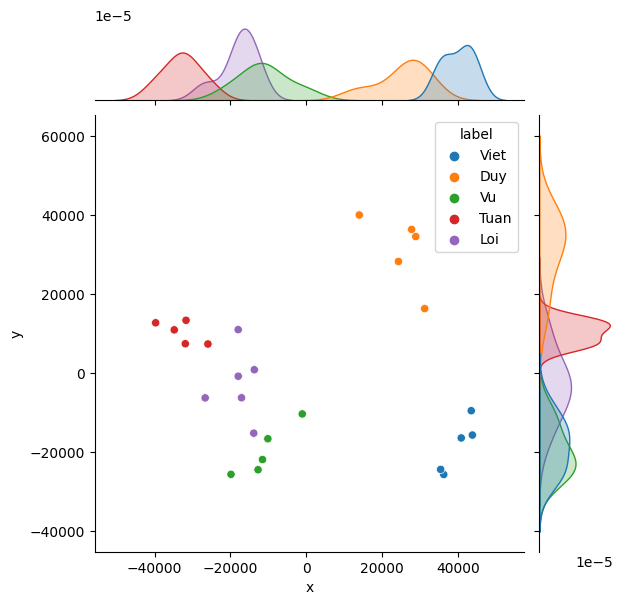

In [34]:
import seaborn as sns
sns.jointplot(x='x', y= 'y', hue='label', data = df)

In [35]:
df

,path,label,x,y
0,D:\Study\AI\Project\Main\\training_data\ps1-1.jpg,Viet,43872.338456,-15700.570187
1,D:\Study\AI\Project\Main\\training_data\ps1-2.jpg,Viet,43565.753322,-9534.952331
2,D:\Study\AI\Project\Main\\training_data\ps1-4.jpg,Viet,36314.033884,-25689.807924
3,D:\Study\AI\Project\Main\\training_data\ps1-5.jpg,Viet,40927.147925,-16435.066331
4,D:\Study\AI\Project\Main\\training_data\ps1-6.jpg,Viet,35499.608212,-24405.270299
5,D:\Study\AI\Project\Main\\training_data\ps2-1.jpg,Duy,14005.275790,40052.457590
6,D:\Study\AI\Project\Main\\training_data\ps2-2.jpg,Duy,31276.991286,16338.424329
7,D:\Study\AI\Project\Main\\training_data\ps2-3.jpg,Duy,24355.690849,28270.870470
8,D:\Study\AI\Project\Main\\training_data\ps2-5.jpg,Duy,27839.969582,36387.570377
9,D:\Study\AI\Project\Main\\training_data\ps2-6.jpg,Duy,28922.644036,34592.543736


In [36]:
df['x'][17]

-31912.382102216117